# Confusion Matrix

In den Confusion Matrixen geht es darum, sich die Ergebnisse im Detail anzusehen. Hierbei werden Fehler 1ster(Falsch Positiv) und 2ter Art(Falsch Negativ) in Relation zu den True Positives und True Negatives gesetzt. Ziel ist es, in Vergleich zweier Modelle das geeignetere zu finden

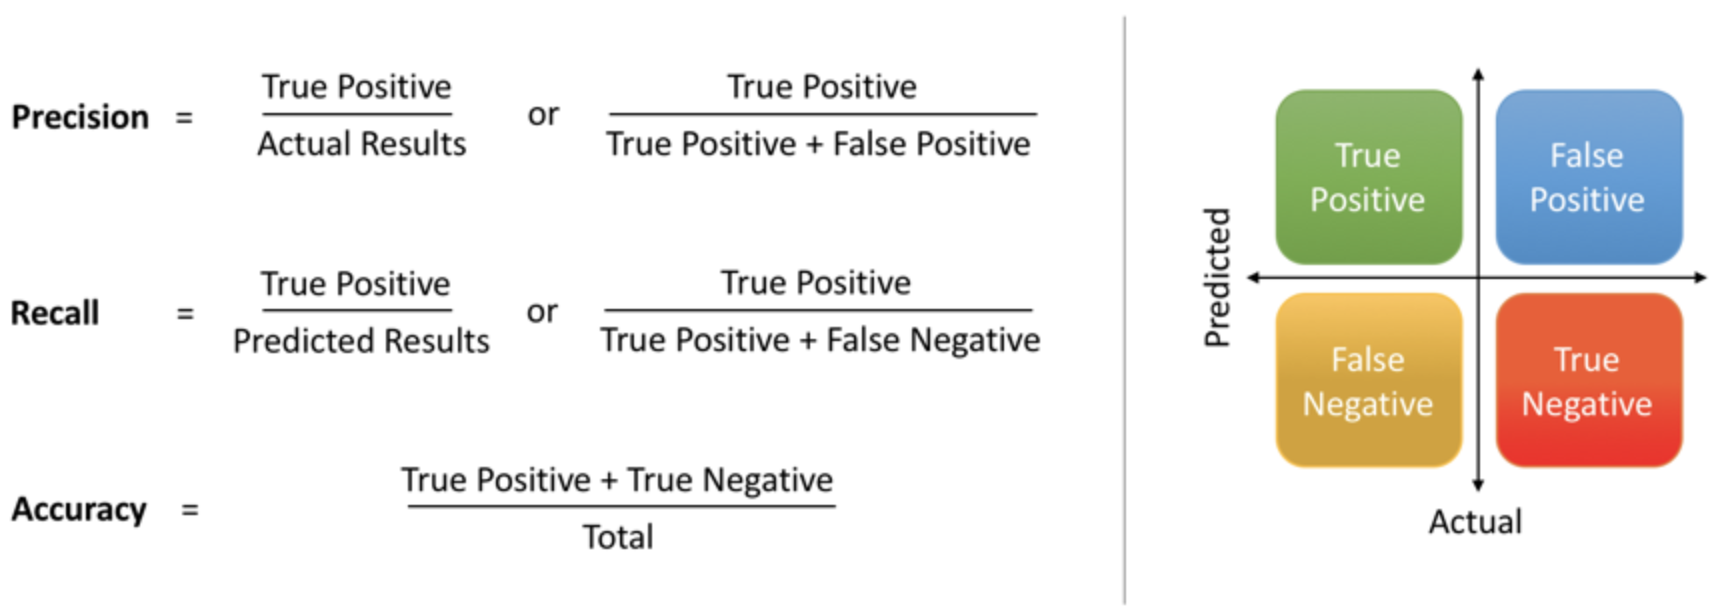

In [1]:
from IPython.display import Image
Image("./conmat.png")

# Beispiel: Herzkrankheiten klassifizieren

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
df = pd.read_csv('./data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
y = df['target']
X = df.drop('target', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
#data splitten, bevor wir es skalieren, damit es am training aber nicht testing data angesetzt ist
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#daten skalieren, x_trainingsdaten standartisieren
scaler = StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [18]:
#model aufsetzen und trainieren
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [19]:
#accuracy des classifisers berechnen
score = accuracy_score(y_test, pred)
score

0.8524590163934426

In [21]:
#confusion matrix erstellen: 25 True Positive, 4 FP, 5 FN, 27 TN
confusion_matrix(y_test, pred)

array([[25,  4],
       [ 5, 27]])

In [23]:
#benennung der tn etc.
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
(tn, fp, fn, tp)

(25, 4, 5, 27)

In [25]:
#matrix erstellen
matrix = classification_report(y_test, pred)
print('classification report: \n\n', matrix)

classification report: 

               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Alternative Visualisierung

In [37]:
import seaborn as sns
import numpy as np

<AxesSubplot:>

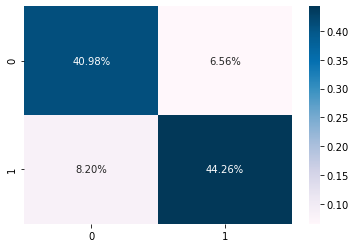

In [65]:
#/np.sum etc., um die prozentzahl hinzuzufügen, optional cmap = 'Blues' für farbänderung
sns.heatmap(confusion_matrix(y_test, pred)/np.sum(confusion_matrix(y_test, pred)), annot=True, fmt='.2%', cmap = 'PuBu')

<AxesSubplot:>

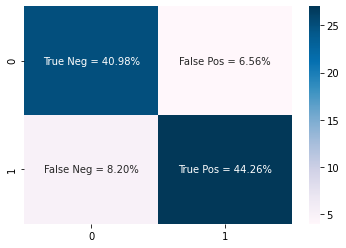

In [66]:
#labels hinzufügen und beschriften

labels = ['True Neg = 40.98%','False Pos = 6.56%','False Neg = 8.20%','True Pos = 44.26%']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, pred), annot=labels, fmt = '', cmap = 'PuBu')

<AxesSubplot:>

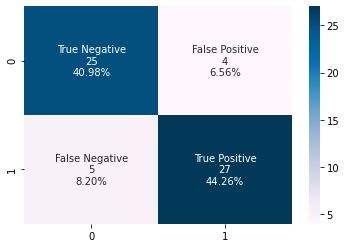

In [68]:
#labels automatisch berechnen lassen und Zahlen automatisch einfügen (falls mal mehr als 4 Felder zu füllen sind)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, pred).flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix(y_test, pred).flatten()/np.sum(confusion_matrix(y_test, pred))]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, pred), annot=labels, fmt='', cmap='PuBu')